In [ ]:
!pip install python-dotenv openai langdetect
!pip install -qU langchain-text-splitters
!pip install langchain-community langchain-text-splitters langchain-openai langchain-chroma gradio
!pip install -qU langchain-community faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=a432dfd393938fbfb555c89893affef5fe538bc29e2735a20810c73c9811c2cc
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
upload_to_google_drive = files.upload()

Mounted at /content/drive


Saving API Key.env to API Key.env


In [ ]:
import pandas as pd

books = pd.read_csv('/content/Goodreads_BestBooksEver_1-10000.csv')
books.head()

In [ ]:
display(books.describe(), books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              10000 non-null  object 
 1   bookTitle        10000 non-null  object 
 2   bookImage        9988 non-null   object 
 3   bookAuthors      10000 non-null  object 
 4   bookDesc         9950 non-null   object 
 5   bookRating       10000 non-null  float64
 6   ratingCount      10000 non-null  int64  
 7   reviewCount      10000 non-null  int64  
 8   bookPages        9905 non-null   object 
 9   bookGenres       9900 non-null   object 
 10  bookISBN         8501 non-null   float64
 11  recommendations  9852 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 937.6+ KB


,bookRating,ratingCount,reviewCount,bookISBN
count,10000.000000,1.000000e+04,10000.000000,8.501000e+03
mean,4.053758,1.039182e+05,4953.632100,9.770250e+12
std,0.254552,3.275863e+05,11594.836725,3.133383e+11
min,2.050000,1.000000e+00,0.000000,9.780616e+09
25%,3.890000,9.914000e+03,541.750000,9.780316e+12
50%,4.060000,2.595150e+04,1447.500000,9.780553e+12
75%,4.220000,7.097550e+04,3878.250000,9.781400e+12
max,5.000000,7.550262e+06,176063.000000,9.789972e+12


None

In [ ]:
books = books.loc[~(books['bookImage'].isna())]
books.drop("recommendations", axis = 1, inplace = True)
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          9988 non-null   object 
 1   bookTitle    9988 non-null   object 
 2   bookImage    9988 non-null   object 
 3   bookAuthors  9988 non-null   object 
 4   bookDesc     9939 non-null   object 
 5   bookRating   9988 non-null   float64
 6   ratingCount  9988 non-null   int64  
 7   reviewCount  9988 non-null   int64  
 8   bookPages    9897 non-null   object 
 9   bookGenres   9893 non-null   object 
 10  bookISBN     8492 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 936.4+ KB


<ipython-input-26-60e3b1d08a71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.drop("recommendations", axis = 1, inplace = True)


In [ ]:
import numpy as np
books["bookPages"] = np.where(books["bookPages"].isna(),
                              "Unknown",
                              books["bookPages"])


In [ ]:
books["bookISBN"] = books["bookISBN"].apply(lambda x: str(x)[:-3] if pd.notna(x) else x)

In [ ]:
import random

books['bookISBN'] = books['bookISBN'].apply(lambda x: "978" + "".join(str(random.randint(0, 9))
                                            for _ in range(9)) if pd.isna(x) else x)

In [ ]:
books['bookGenres'] = books['bookGenres'].str.replace(r'/\d+,\d+', '', regex=True).str.replace(r'/\d+', '', regex=True).str.split("|").str[0]

In [ ]:
from dotenv import load_dotenv
import os
from openai import OpenAI

load_dotenv("/content/API Key.env")
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI()

def convert_genres_category(x):
    system_prompt = """
            You are an e-commerce platform system assistant.
            Your main task is to classify book genres as accurately as possible,
            returning only one of the following categories: Fiction, Nonfiction, Love, Literature, Wars, Science, Documentary.
        """
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": x}
        ]
        )

    return response.choices[0].message.content


books["bookGenres"] = books["bookGenres"].apply(
    lambda x: convert_genres_category(x) if pd.notna(x) else x
)

In [ ]:
 books.to_csv("cleaned.csv", index = False)

In [ ]:
books['bookGenres'].isna().sum()

95

In [ ]:
books["bookGenres"][:10]

,bookGenres
0,Fiction
1,Fiction
2,Literature
3,Literature
4,Fiction
5,Fiction
6,Literature
7,Fiction
8,Fiction
9,Literature


In [ ]:
# pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# !git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
# !cd pytorch-CycleGAN-and-pix2pix
# !pip install -r /content/pytorch-CycleGAN-and-pix2pix/requirements.txt


fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=0ba2bb69a80348919957272a4fc48faa7559156706a7d9efd33871d018894f97
  Stored in directory: /root/.cache/pip/wheels/fa/a4/bb/2be445c295d88a74f9c0a4232f04860ca489a5c7c57eb959d9
Successfully built visdom


In [ ]:
# !python /content/pytorch-CycleGAN-and-pix2pix/train.py --dataroot /content/drive/MyDrive/tam --name license_cyclegan --model cycle_gan --gpu_ids 0


----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/tam    	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

In [ ]:
# !mkdir -p datasets/license_plates

In [ ]:
# mkdir -p /content/drive/MyDrive/tam/trainA /content/drive/MyDrive/tam/trainB

In [ ]:
# !python /content/pytorch-CycleGAN-and-pix2pix/train.py --dataroot /content/drive/MyDrive/tam --name license_cyclegan --model cycle_gan --gpu_ids 0

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/tam    	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

In [ ]:
# mkdir -p /content/drive/MyDrive/tam/testA /content/drive/MyDrive/tam/testB

In [ ]:
# !python /content/pytorch-CycleGAN-and-pix2pix/test.py --dataroot /content/drive/MyDrive/tam --name license_cyclegan --model cycle_gan --gpu_ids 0

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/tam    	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

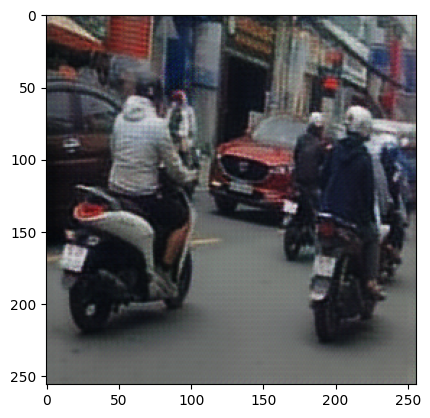

In [ ]:
# import matplotlib.pyplot as plt
# import cv2

# img = cv2.imread('./results/license_cyclegan/test_latest/images/Dieu_0117_fake_A.png')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()


In [ ]:
# ls ./results/license_cyclegan/test_latest/images/

Dieu_0117_fake_A.png  Dieu_0121_real_A.png  Dieu_0132_rec_A.png   Dieu_0143_fake_A.png
Dieu_0117_fake_B.png  Dieu_0121_real_B.png  Dieu_0132_rec_B.png   Dieu_0143_fake_B.png
Dieu_0117_real_A.png  Dieu_0121_rec_A.png   Dieu_0142_fake_A.png  Dieu_0143_real_A.png
Dieu_0117_real_B.png  Dieu_0121_rec_B.png   Dieu_0142_fake_B.png  Dieu_0143_real_B.png
Dieu_0117_rec_A.png   Dieu_0132_fake_A.png  Dieu_0142_real_A.png  Dieu_0143_rec_A.png
Dieu_0117_rec_B.png   Dieu_0132_fake_B.png  Dieu_0142_real_B.png  Dieu_0143_rec_B.png
Dieu_0121_fake_A.png  Dieu_0132_real_A.png  Dieu_0142_rec_A.png
Dieu_0121_fake_B.png  Dieu_0132_real_B.png  Dieu_0142_rec_B.png


## **Cleaned CSV**

In [ ]:
books = pd.read_csv("/content/drive/MyDrive/cleaned.csv")
books.head(5)

,url,bookTitle,bookImage,bookAuthors,bookDesc,bookRating,ratingCount,reviewCount,bookPages,bookGenres,bookISBN
0,https://www.goodreads.com/book/show/2767052-th...,The Hunger Games,https://i.gr-assets.com/images/S/compressed.ph...,Suzanne Collins,"Could you survive on your own in the wild, wit...",4.32,6717635,176054,374 pages,Fiction,978043902348
1,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix,https://i.gr-assets.com/images/S/compressed.ph...,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,4.50,2668409,45724,870 pages,Fiction,978806851699
2,https://www.goodreads.com/book/show/2657.To_Ki...,To Kill a Mockingbird,https://i.gr-assets.com/images/S/compressed.ph...,Harper Lee,The unforgettable novel of a childhood in a sl...,4.28,4772918,95595,324 pages,Literature,978413470333
3,https://www.goodreads.com/book/show/1885.Pride...,Pride and Prejudice,https://i.gr-assets.com/images/S/compressed.ph...,"Jane Austen,Anna Quindlen",Alternate cover edition of ISBN 9780679783268S...,4.27,3206070,74020,279 pages,Literature,978981629550
4,https://www.goodreads.com/book/show/41865.Twil...,Twilight,https://i.gr-assets.com/images/S/compressed.ph...,Stephenie Meyer,About three things I was absolutely positive.F...,3.61,5231000,107619,501 pages,Fiction,978031601584


In [ ]:
books = books[~books["bookDesc"].isna()]

In [ ]:
from langdetect import detect, DetectorFactory

def is_english(text):
    if detect(text) == 'en':
        return text
    else:
        return "not english"

books["bookDesc"] = books["bookDesc"].apply(lambda x: is_english(x) if pd.notna(x) else x)

In [ ]:
books.drop_duplicates(subset="bookDesc", inplace=True)

In [ ]:
def delete_noncategory(x):
    if x in ["Fiction", "Nonfiction", "Love", "Literature", "Wars", "Science", "Documentary"]:
        return x
    else:
        return "Unknown"

books["bookGenres"] = books["bookGenres"].apply(lambda x: delete_noncategory(x) if pd.notna(x) else x)
books = books.loc[~(books["bookGenres"].isin(["Unknown"]))]

In [ ]:
def make_category(x):
    system_prompt = """
        you are a helpful assistant that can generate text based on existing information,
        and return one of the following results: Fiction, Nonfiction, Love, Literature, Wars, Science, Documentary.
        => Returns only a single word.
    """
    reponse = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": x}
        ]
    )
    return reponse.choices[0].message.content


books.loc[books["bookGenres"].isna(), "bookGenres"] = books.loc[books["bookGenres"].isna()].apply(
    lambda x: make_category(x["bookDesc"]), axis=1
)

NameError: name 'client' is not defined

In [ ]:
books["isbn_description"] = books[["bookISBN","bookDesc"]].apply(
    lambda row: str(row["bookISBN"]) + " " + row["bookDesc"], axis=1
)

In [ ]:
books.head(5)

,url,bookTitle,bookImage,bookAuthors,bookDesc,bookRating,ratingCount,reviewCount,bookPages,bookGenres,bookISBN,isbn_description
0,https://www.goodreads.com/book/show/2767052-th...,The Hunger Games,https://i.gr-assets.com/images/S/compressed.ph...,Suzanne Collins,"Could you survive on your own in the wild, wit...",4.32,6717635,176054,374 pages,Fiction,978043902348,978043902348 Could you survive on your own in ...
1,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix,https://i.gr-assets.com/images/S/compressed.ph...,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,4.50,2668409,45724,870 pages,Fiction,978806851699,978806851699 There is a door at the end of a s...
2,https://www.goodreads.com/book/show/2657.To_Ki...,To Kill a Mockingbird,https://i.gr-assets.com/images/S/compressed.ph...,Harper Lee,The unforgettable novel of a childhood in a sl...,4.28,4772918,95595,324 pages,Literature,978413470333,978413470333 The unforgettable novel of a chil...
3,https://www.goodreads.com/book/show/1885.Pride...,Pride and Prejudice,https://i.gr-assets.com/images/S/compressed.ph...,"Jane Austen,Anna Quindlen",Alternate cover edition of ISBN 9780679783268S...,4.27,3206070,74020,279 pages,Literature,978981629550,978981629550 Alternate cover edition of ISBN 9...
4,https://www.goodreads.com/book/show/41865.Twil...,Twilight,https://i.gr-assets.com/images/S/compressed.ph...,Stephenie Meyer,About three things I was absolutely positive.F...,3.61,5231000,107619,501 pages,Fiction,978031601584,978031601584 About three things I was absolute...


In [ ]:
def make_yearpublished(x):
    system_prompt = """
        you are a helpful assistant,
        you are a bookworm you know the release dates of books. And returns the year.
        -> Returns only a single word.
    """

    reponse = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": x}
        ]
    )
    return reponse.choices[0].message.content

books["year_published"] = books["bookDesc"].apply(
    lambda x: make_yearpublished(x) if pd.notna(x) else x)

In [ ]:
books.to_csv("final_cleaned.csv", index = False)

## **Final cleaned csv**

In [ ]:
final_books = pd.read_csv("/content/drive/MyDrive/final_cleaned.csv")
final_books.head(5)

,url,bookTitle,bookImage,bookAuthors,bookDesc,bookRating,ratingCount,reviewCount,bookPages,bookGenres,bookISBN,isbn_description,year_published
0,https://www.goodreads.com/book/show/2767052-th...,The Hunger Games,https://i.gr-assets.com/images/S/compressed.ph...,Suzanne Collins,"Could you survive on your own in the wild, wit...",4.32,6717635,176054,374 pages,Fiction,978043902348,978043902348 Could you survive on your own in ...,Catching
1,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix,https://i.gr-assets.com/images/S/compressed.ph...,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,4.50,2668409,45724,870 pages,Fiction,978806851699,978806851699 There is a door at the end of a s...,2003
2,https://www.goodreads.com/book/show/2657.To_Ki...,To Kill a Mockingbird,https://i.gr-assets.com/images/S/compressed.ph...,Harper Lee,The unforgettable novel of a childhood in a sl...,4.28,4772918,95595,324 pages,Literature,978413470333,978413470333 The unforgettable novel of a chil...,1960
3,https://www.goodreads.com/book/show/1885.Pride...,Pride and Prejudice,https://i.gr-assets.com/images/S/compressed.ph...,"Jane Austen,Anna Quindlen",Alternate cover edition of ISBN 9780679783268S...,4.27,3206070,74020,279 pages,Literature,978981629550,978981629550 Alternate cover edition of ISBN 9...,1813
4,https://www.goodreads.com/book/show/41865.Twil...,Twilight,https://i.gr-assets.com/images/S/compressed.ph...,Stephenie Meyer,About three things I was absolutely positive.F...,3.61,5231000,107619,501 pages,Fiction,978031601584,978031601584 About three things I was absolute...,2005


In [ ]:
final_books["year_published"] = final_books["year_published"].str.extract(r'(\d+)')
final_books.dropna(subset=['year_published'], inplace=True)
final_books['year_published'] = final_books['year_published'].astype(int)
final_books['year_published']

,year_published
1,2003
2,1960
3,1813
4,2005
5,2005
...,...
7806,2010
7807,1931
7808,2006
7810,2019


In [ ]:
final_books.drop_duplicates("bookTitle", inplace=True)

In [ ]:
for value in final_books["isbn_description"]:
    with open("database_for_query.txt", "a") as file:
        file.write(f"{value}\n")

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings


raw_documents = TextLoader("/content/drive/MyDrive/database_for_query.txt").load()
text_splitter = CharacterTextSplitter(chunk_size = 0, chunk_overlap = 0, separator = "\n")
documents = text_splitter.split_documents(raw_documents)

Streaming output truncated to the last 5000 lines.


In [ ]:
from langchain_community.vectorstores import FAISS

import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")
index = faiss.IndexFlatL2(3072)

vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [ ]:
vector_store.add_documents(documents)

['ac7abbe7-975a-4562-a1aa-656170729394',
 '6c32bf97-6169-4310-943d-c6f62eac2394',
 '371507c6-efc9-4437-8566-00fba6a8ad41',
 '51832fa9-42cb-4175-bd9f-cee92bc10719',
 '519a3dd4-dcdc-4429-af47-d4cc3c6acde6',
 '7c0909d1-c5f4-451e-9b97-bfb620700947',
 '7672182e-7f8a-4027-9342-7aac3dce11bb',
 'e65e722f-59a7-4df6-9785-31d8a9489a54',
 '2d60d589-4a1a-4e9d-aed3-c535b1cfe0fc',
 '4d76018f-c41f-4dd9-9684-eef2114aac19',
 'f0ce2946-c404-4479-aff0-a1b4fee00bad',
 'be52c86a-f22e-4a48-bb36-455efac53bf6',
 '76081375-a928-4d6d-ac16-36135fdd413e',
 '39004416-88c1-47f7-9526-eeee7a9a2873',
 '65ea055d-2b54-4efb-b209-4f2071d7ee04',
 '5e7454be-63ea-47e6-80cb-2bc5b4484e65',
 'df4bfee9-f098-4988-9ccb-8782b47ffd44',
 '9877d8fc-6aea-45a8-815d-3eabefbb2a22',
 'd3a842bc-1667-4fe4-8b09-bc6d073d89e9',
 '8ce4bb77-8614-4299-8931-a0a8067eb79f',
 'b3b8731a-f2e6-4071-8fe9-4c6c4e426f58',
 'a7de6cd0-d63d-4d9a-aec6-96a96d5f8800',
 '9d379736-a04f-45d0-95bc-3bb3aeb4a763',
 '39153558-9f58-454d-9928-62104ecba2a2',
 '5d9ecbe6-8952-

In [ ]:
query = "book about love"
retriever = vector_store.as_retriever(search_kwargs={"k": 10})
docs = retriever.invoke(query)

In [ ]:
final_books.reset_index(drop=True, inplace=True)

In [ ]:
for i in final_books["bookDesc"][2985:2987]:
    print(i)

The weird fiction short stories of H.P. Lovecraft from 1917-1935. Excludes collaborations.The eBook’s table of contents is listed below. It includes the year each story was written.The Tomb (1917)Dagon (1917)Polaris (1918)Beyond the Wall of Sleep (1919)Memory (1919)Old Bugs (1919)The Transition of Juan Romero (1919)The White Ship (1919)The Doom That Came to Sarnath (1919)The Statement of Randolph Carter (1919)The Terrible Old Man (1920)The Tree (1920)The Cats of Ulthar (1920)The Temple (1920)Facts Concerning the Late Arthur Jermyn and His Family (1920)The Street (1920)Celephaïs (1920)From Beyond (1920)Nyarlathotep (1920)The Picture in the House (1920)Ex Oblivione (1921)The Nameless City (1921)The Quest of Iranon (1921)The Moon-Bog (1921)The Outsider (1921)The Other Gods (1921)The Music of Erich Zann (1921)Herbert West — Reanimator (1922)Hypnos (1922)What the Moon Brings (1922)Azathoth (1922)The Hound (1922)The Lurking Fear (1922)The Rats in the Walls (1923)The Unnamable (1923)The Festi

In [ ]:
final_books["bookDesc"].str.len().sort_values().tail(30)

,bookDesc
2574,2782
3961,2796
5384,2856
5064,2888
576,2901
1191,2973
4618,3004
3150,3008
4986,3027
5092,3136


In [ ]:
from transformers import pipeline, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
pipe = pipeline("text-classification",
                model="j-hartmann/emotion-english-distilroberta-base",
                top_k = None,
                tokenizer=tokenizer,
                device=-1)

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
emotion_scores = {label: [] for label in emotion_labels}

for idx, i in enumerate(final_books["bookDesc"]):
    emotion_scores_per = {label: [] for label in emotion_labels}
    sentences = [s.strip() for s in i.split(".") if s.strip()]
    print(idx)
    for text in sentences:
        inputs = tokenizer(text, truncation=True, max_length=512,
                           padding=True,
                           return_tensors="pt")
        input_text = tokenizer.decode(inputs["input_ids"][0], skip_special_tokens = True)

        num_tokens = len(inputs["input_ids"][0])
        if num_tokens >= 512:
            continue

        sorted_emotion = sorted(pipe(input_text)[0], key=lambda x: x["score"], reverse=True)

        for j in sorted_emotion:
            emotion_scores_per[j["label"]].append(j["score"])


    for key, value in emotion_scores_per.items():
        emotion_scores[key].append(max(value))

Device set to use cpu


Streaming output truncated to the last 5000 lines.
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434

In [ ]:
emotion_scores["disgust"][:10]

[0.04694409668445587,
 0.057885393500328064,
 0.1081346794962883,
 0.5504707098007202,
 0.6556827425956726,
 0.7337102890014648,
 0.023719651624560356,
 0.05116531625390053,
 0.05585595965385437,
 0.018025528639554977]

In [ ]:
emotion_df = pd.DataFrame(emotion_scores)
books_with_emotions = pd.concat([final_books, emotion_df], ignore_index=False, axis=1)
books_with_emotions.head()

,url,bookTitle,bookImage,bookAuthors,bookDesc,bookRating,ratingCount,reviewCount,bookPages,bookGenres,bookISBN,isbn_description,year_published,anger,disgust,fear,joy,sadness,surprise,neutral
0,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix,https://i.gr-assets.com/images/S/compressed.ph...,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,4.50,2668409,45724,870 pages,Fiction,978806851699,978806851699 There is a door at the end of a s...,2003,0.015363,0.046944,0.972221,0.005747,0.180291,0.335434,0.725386
1,https://www.goodreads.com/book/show/2657.To_Ki...,To Kill a Mockingbird,https://i.gr-assets.com/images/S/compressed.ph...,Harper Lee,The unforgettable novel of a childhood in a sl...,4.28,4772918,95595,324 pages,Literature,978413470333,978413470333 The unforgettable novel of a chil...,1960,0.030884,0.057885,0.679220,0.688215,0.058717,0.189221,0.731879
2,https://www.goodreads.com/book/show/1885.Pride...,Pride and Prejudice,https://i.gr-assets.com/images/S/compressed.ph...,"Jane Austen,Anna Quindlen",Alternate cover edition of ISBN 9780679783268S...,4.27,3206070,74020,279 pages,Literature,978981629550,978981629550 Alternate cover edition of ISBN 9...,1813,0.268283,0.108135,0.109350,0.964692,0.132204,0.067046,0.563436
3,https://www.goodreads.com/book/show/41865.Twil...,Twilight,https://i.gr-assets.com/images/S/compressed.ph...,Stephenie Meyer,About three things I was absolutely positive.F...,3.61,5231000,107619,501 pages,Fiction,978031601584,978031601584 About three things I was absolute...,2005,0.261599,0.550471,0.972002,0.946333,0.017174,0.047565,0.389860
4,https://www.goodreads.com/book/show/19063.The_...,The Book Thief,https://i.gr-assets.com/images/S/compressed.ph...,Markus Zusak,Librarian's note: An alternate cover edition c...,4.38,1954165,117307,552 pages,Fiction,978037583100,978037583100 Librarian's note: An alternate co...,2005,0.297602,0.655683,0.906952,0.195374,0.632411,0.262819,0.748024


In [ ]:
books_with_emotions.to_csv("book_with_emotions.csv", index = False)

## **Read df with emotions**

In [ ]:
books_with_emotions = pd.read_csv("/content/drive/MyDrive/book_with_emotions.csv")
books_with_emotions.head()

,url,bookTitle,bookImage,bookAuthors,bookDesc,bookRating,ratingCount,reviewCount,bookPages,bookGenres,bookISBN,isbn_description,year_published,anger,disgust,fear,joy,sadness,surprise,neutral
0,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix,https://i.gr-assets.com/images/S/compressed.ph...,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,4.50,2668409,45724,870 pages,Fiction,978806851699,978806851699 There is a door at the end of a s...,2003,0.015363,0.046944,0.972221,0.005747,0.180291,0.335434,0.725386
1,https://www.goodreads.com/book/show/2657.To_Ki...,To Kill a Mockingbird,https://i.gr-assets.com/images/S/compressed.ph...,Harper Lee,The unforgettable novel of a childhood in a sl...,4.28,4772918,95595,324 pages,Literature,978413470333,978413470333 The unforgettable novel of a chil...,1960,0.030884,0.057885,0.679220,0.688215,0.058717,0.189221,0.731879
2,https://www.goodreads.com/book/show/1885.Pride...,Pride and Prejudice,https://i.gr-assets.com/images/S/compressed.ph...,"Jane Austen,Anna Quindlen",Alternate cover edition of ISBN 9780679783268S...,4.27,3206070,74020,279 pages,Literature,978981629550,978981629550 Alternate cover edition of ISBN 9...,1813,0.268283,0.108135,0.109350,0.964692,0.132204,0.067046,0.563436
3,https://www.goodreads.com/book/show/41865.Twil...,Twilight,https://i.gr-assets.com/images/S/compressed.ph...,Stephenie Meyer,About three things I was absolutely positive.F...,3.61,5231000,107619,501 pages,Fiction,978031601584,978031601584 About three things I was absolute...,2005,0.261599,0.550471,0.972002,0.946333,0.017174,0.047565,0.389860
4,https://www.goodreads.com/book/show/19063.The_...,The Book Thief,https://i.gr-assets.com/images/S/compressed.ph...,Markus Zusak,Librarian's note: An alternate cover edition c...,4.38,1954165,117307,552 pages,Fiction,978037583100,978037583100 Librarian's note: An alternate co...,2005,0.297602,0.655683,0.906952,0.195374,0.632411,0.262819,0.748024


In [ ]:
def retriever_book_from_database(query: str, tone: str = None, category = None, k: int = 20) -> pd.DataFrame:
    retriever = vector_store.as_retriever(search_kwargs={"k": k})
    docs = retriever.invoke(query)

    isbn_list = []
    for doc in docs:
        try:
            isbn = int(doc.page_content.split()[0].strip())
            isbn_list.append(isbn)
        except (ValueError, IndexError):
            continue


    books_query = books_with_emotions[books_with_emotions["bookISBN"].isin(isbn_list)].head(k)
    if category != "All":
        books_query = books_query[books_query["bookGenres"].isin([category])].head(k)
    else:
        books_query = books_query.head(20)


    if tone == "Happy":
        books_query = books_query.sort_values(by="joy", ascending=False)
    elif tone == "Sad":
        books_query = books_query.sort_values(by="sadness", ascending=False)
    elif tone == "Angry":
        books_query = books_query.sort_values(by="anger", ascending=False)
    elif tone == "Fear":
        books_query = books_query.sort_values(by="fear", ascending=False)
    elif tone == "Neutral":
        books_query = books_query.sort_values(by="neutral", ascending=False)
    elif tone == "Surprise":
        books_query = books_query.sort_values(by="surprise", ascending=False)
    else:
        books_query = books_query.sort_values(by="disgust", ascending=False)

    return books_query


retriever_book_from_database("book about vietnam")

,url,bookTitle,bookImage,bookAuthors,bookDesc,bookRating,ratingCount,reviewCount,bookPages,bookGenres,bookISBN,isbn_description,year_published,anger,disgust,fear,joy,sadness,surprise,neutral


In [ ]:
def query_books(query: str, category: str, tone: str):
    try:
        test = retriever_book_from_database(query, tone, category)
        authors = test["bookAuthors"].apply(
            lambda x: ", ".join(x.split()[:3]) + "....." if len(x.split()) > 3 else x
        )
        title = test["bookTitle"].apply(
            lambda x: ", ".join(x.split()[:8]) + "....." if len(x.split()) >= 8 else x
        )
        description_book = test["bookDesc"].apply(
            lambda x: ", ".join(x.split()[:30]) + "....." if len(x.split()) >= 30 else x
        )
        captions = (
            "Author: " + authors + "\nTitle: " + title + "\nDescription: " + description_book
        )
        information_books = list(zip(test["bookImage"], captions))
        return information_books
    except Exception as e:
        return [("", f"Error: {str(e)}")]


categores = ["All"] + sorted(books_with_emotions["bookGenres"].unique())
tones = ["All"] + ["Happy", "Fear", "Angry", "Surprise", "Sad", "Disgust", "Neutral"]

import gradio as gr

with gr.Blocks(theme = gr.themes.Glass()) as dashboard:
    gr.Markdown("# Book Recommendation")

    with gr.Row():
        user_query = gr.Textbox(label = "Please enter a description of a book:",
                                placeholder = "e.g., A story about forgiveness")
        category_dropdown = gr.Dropdown(choices = categores, label = "Select a category" , value = "All")
        tone_dropdown = gr.Dropdown(choices = tones, label = "Select an emotional tone:", value = "All")
        submit = gr.Button("Find recommendations")

    gr.Markdown("## Recommendation")
    output = gr.Gallery(label = "Recommended books", columns = 8, rows = 2)

    submit.click(fn = query_books,
                 inputs = [user_query, category_dropdown, tone_dropdown],
                 outputs = output)


dashboard.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://06e0b84e8cfa40cf4f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
